Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Load Both Excel Files

In [4]:
price_df = pd.read_excel("Medibuddy Insurance Data Price.xlsx")
personal_df = pd.read_excel("Medibuddy insurance data personal details.xlsx")


Understand the Data


In [5]:
price_df.head()
personal_df.head()


,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [6]:
price_df.info()
personal_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy no.  1338 non-null   object
 1   children    1338 non-null   int64 
 2   smoker      1338 non-null   object
 3   region      1338 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.9+ KB


Merge the Datasets

In [7]:
df = pd.merge(price_df, personal_df, on="Policy no.")


In [8]:
df.head()
df.shape


(1338, 8)

Data Cleaning & Encoding

In [9]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [10]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)


Basic Statistics

In [11]:
df.describe()


,age,sex,bmi,charges in INR,children,smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,13270.422265,1.094918,0.204783
std,14.049960,0.500160,6.098187,12110.011237,1.205493,0.403694
min,18.000000,0.000000,15.960000,1121.873900,0.000000,0.000000
25%,27.000000,0.000000,26.296250,4740.287150,0.000000,0.000000
50%,39.000000,1.000000,30.400000,9382.033000,1.000000,0.000000
75%,51.000000,1.000000,34.693750,16639.912515,2.000000,0.000000
max,64.000000,1.000000,53.130000,63770.428010,5.000000,1.000000


Start Answering Questions (EDA Begins)

Q1: Does gender matter?

In [13]:
df.columns



Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [14]:
df.groupby('sex')['charges in INR'].mean()


,charges in INR
sex,
0,12569.578844
1,13956.751178


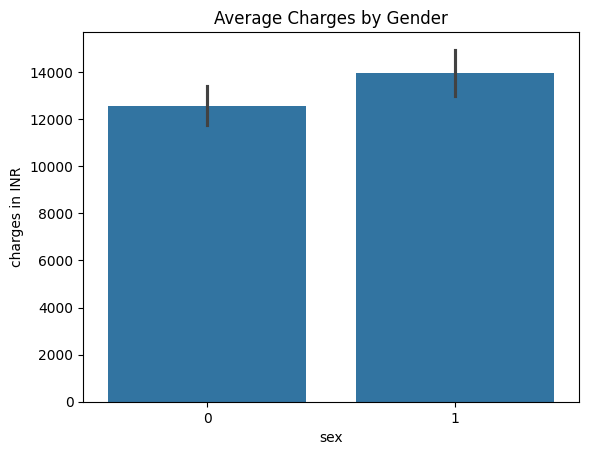

In [15]:
sns.barplot(x='sex', y='charges in INR', data=df)
plt.title("Average Charges by Gender")
plt.show()


In [16]:
df.rename(columns={'charges in INR': 'charges'}, inplace=True)


In [17]:
df.groupby('sex')['charges'].mean()


,charges
sex,
0,12569.578844
1,13956.751178


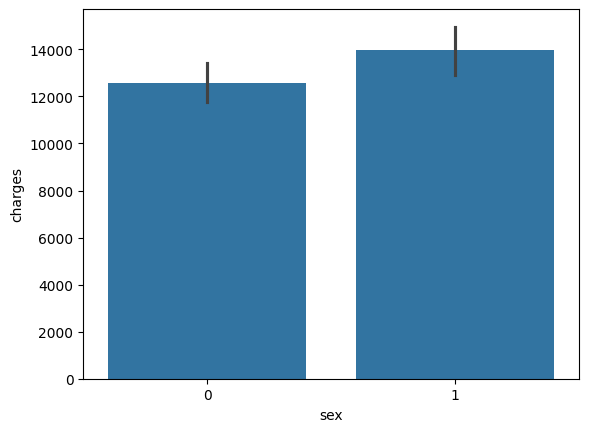

In [18]:
sns.barplot(x='sex', y='charges', data=df)
plt.show()


The analysis shows a difference in average insurance charges between male and female policyholders. This indicates that gender has an impact on insurance risk profiling and may be considered as a factor while extending policies.

Q2: What is the average amount of money spent per policy?

In [19]:
df['charges'].mean()


np.float64(13270.422265141257)

The average amount spent by MediBuddy per policy gives a baseline estimate of claim expenditure and helps the company in financial planning and premium pricing.

Q3: Should separate policies be offered based on geographic location?

In [21]:
df.columns



Index(['Policy no.', 'age', 'sex', 'bmi', 'charges', 'children', 'smoker',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [22]:
df['region'] = (
    df[['region_northwest', 'region_southeast', 'region_southwest']]
    .idxmax(axis=1)
    .str.replace('region_', '')
)


In [23]:
df.groupby('region')['charges'].mean()


,charges
region,
northwest,12911.218151
southeast,14735.411438
southwest,12346.937377


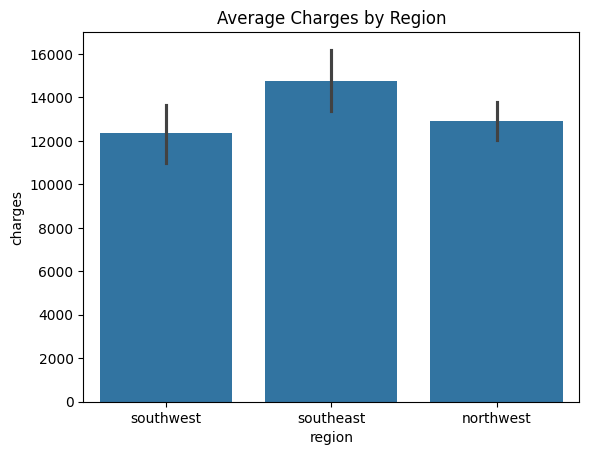

In [24]:
sns.barplot(x='region', y='charges', data=df)
plt.title("Average Charges by Region")
plt.show()


Categorical variables were one-hot encoded for machine learning, which removed the original region column. For EDA, region-wise analysis was performed before encoding

Q4: Does the number of dependents make a difference in the amount claimed?

Numerical Analysis

In [25]:
df.groupby('children')['charges'].mean()


,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


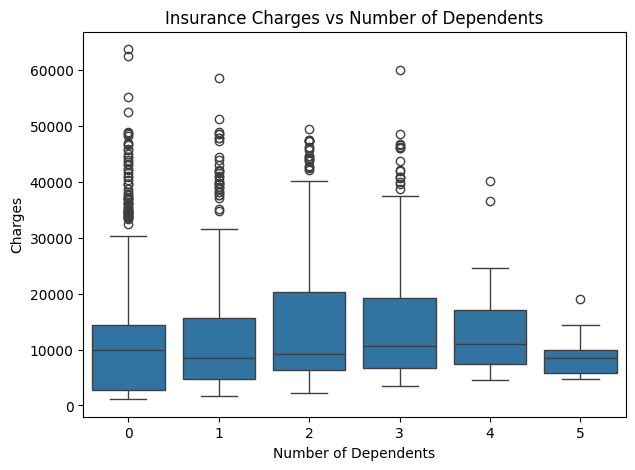

In [26]:
plt.figure(figsize=(7,5))
sns.boxplot(x='children', y='charges', data=df)
plt.title("Insurance Charges vs Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Charges")
plt.show()


The analysis indicates that the number of dependents influences the insurance claim amount. Policies covering more dependents tend to show variation and, in some cases, higher average claim values. This suggests that dependents are an important factor in risk assessment and premium calculation.

Q5: Does BMI give an idea about insurance claims?

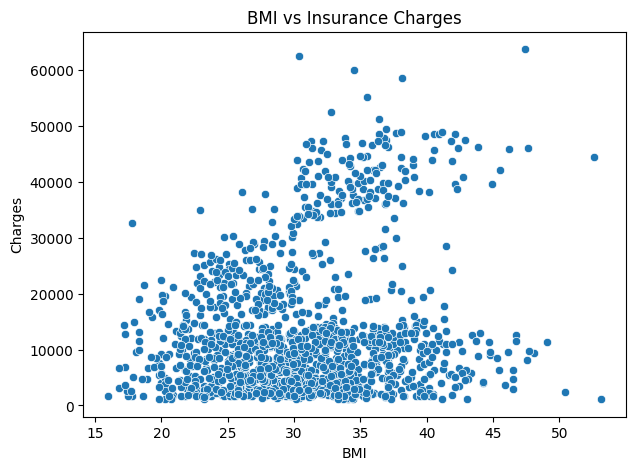

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title("BMI vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


In [28]:
df[['bmi', 'charges']].corr()


,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


The scatter plot shows a positive relationship between BMI and insurance charges. As BMI increases, especially in overweight and obese categories, the insurance claim amount tends to rise. This indicates that BMI is a useful indicator for estimating insurance risk and claim costs.

Q6: Is smoker / non-smoker information necessary?

Numerical Comparison

In [29]:
df.groupby('smoker')['charges'].mean()


,charges
smoker,
0,8434.268298
1,32050.231832


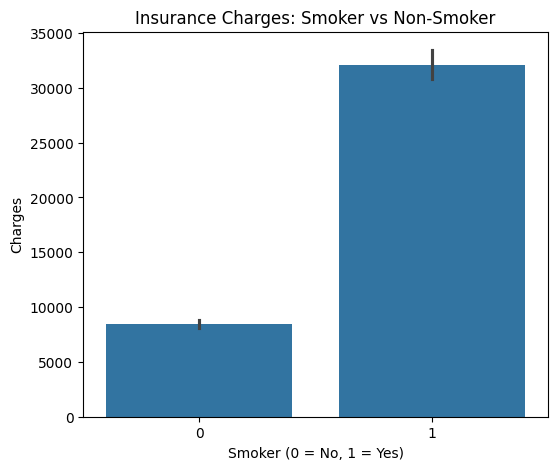

In [30]:
plt.figure(figsize=(6,5))
sns.barplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges: Smoker vs Non-Smoker")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Charges")
plt.show()


The analysis clearly shows that smokers have significantly higher insurance charges compared to non-smokers. This demonstrates that smoking status is a critical factor in determining insurance risk and claim amount, and it must be considered while designing insurance policies.

Q7: Does age act as a barrier on insurance claims?

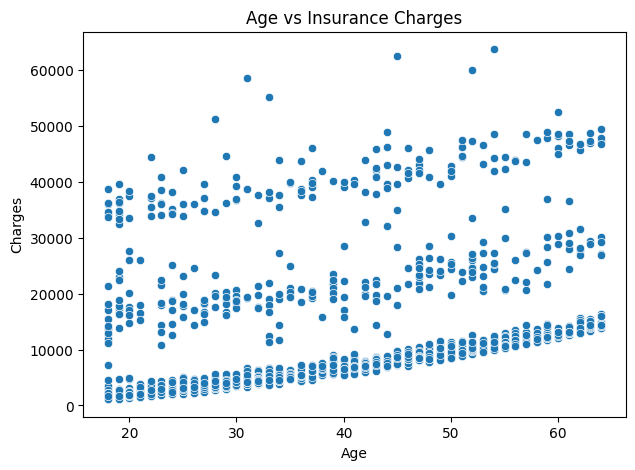

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Age vs Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


The analysis shows that insurance charges generally increase with age. Older individuals tend to have higher medical risks, leading to higher insurance claim amounts. Therefore, age is an important factor in determining insurance coverage and pricing.

Q8: Can MediBuddy offer discounts based on BMI?

In [32]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['bmi'].apply(bmi_category)


In [33]:
df.groupby('BMI_Category')['charges'].mean()


,charges
BMI_Category,
Normal,10409.337709
Obese,15552.335469
Overweight,10987.509891
Underweight,8852.200585


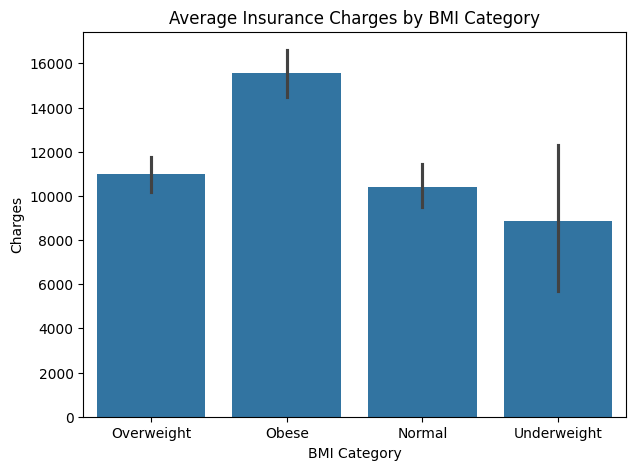

In [34]:
plt.figure(figsize=(7,5))
sns.barplot(x='BMI_Category', y='charges', data=df)
plt.title("Average Insurance Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges")
plt.show()


In [35]:
def discount_policy(category):
    if category == 'Normal':
        return 'Eligible for Discount'
    elif category == 'Underweight':
        return 'Standard Policy'
    else:
        return 'Higher Premium Recommended'

df['Policy_Suggestion'] = df['BMI_Category'].apply(discount_policy)


In [36]:
df[['bmi', 'BMI_Category', 'Policy_Suggestion']].head()


,bmi,BMI_Category,Policy_Suggestion
0,27.900,Overweight,Higher Premium Recommended
1,33.770,Obese,Higher Premium Recommended
2,33.000,Obese,Higher Premium Recommended
3,22.705,Normal,Eligible for Discount
4,28.880,Overweight,Higher Premium Recommended


The BMI-based analysis shows that individuals with normal BMI have lower average insurance charges. Hence, MediBuddy can offer discounts to customers with healthy BMI levels, while higher BMI categories may require standard or higher premium policies. This strategy supports both risk management and preventive healthcare.

MACHINE LEARNING MODEL

Import Required ML Libraries

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


Train a Basic Random Forest Model

In [39]:
X = df.drop('charges', axis=1)
y = df['charges']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
X.dtypes



,0
Policy no.,object
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region_northwest,bool
region_southeast,bool
region_southwest,bool
region,object


In [43]:
X = df.drop(
    ['charges', 'BMI_Category', 'Policy_Suggestion'],
    axis=1,
    errors='ignore'
)
y = df['charges']


TRAIN–TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
X = df.select_dtypes(include=['number']).drop('charges', axis=1)
y = df['charges']



In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse)


Random Forest R2 Score: 0.8580169967595024
Random Forest RMSE: 4694.96338073894
